In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob as gb
from PIL import Image
import tifffile as tiff

%matplotlib inline

In [2]:
root = '/mnt/wamri/panda'

# Look at train.csv

In [3]:
train_csv = os.path.join(root, 'train.csv')

In [4]:
train_csv = pd.read_csv(train_csv)

In [5]:
train_csv

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0
...,...,...,...,...
10611,ffd2841373b39792ab0c84cccd066e31,radboud,0,negative
10612,ffdc59cd580a1468eac0e6a32dd1ff2d,radboud,5,4+5
10613,ffe06afd66a93258f8fabdef6044e181,radboud,0,negative
10614,ffe236a25d4cbed59438220799920749,radboud,2,3+4


# Look at Images and Masks

In [6]:
images = os.path.join(root, 'train_images')

In [7]:
c = 0
for f in gb.glob(os.path.join(images, '*')):
    print(f)
    c += 1

/mnt/wamri/panda/train_images/ab9737067730d88528e4f08a6ca140eb.tiff
/mnt/wamri/panda/train_images/0c21345669287d5b299ed8d7d0f6e1c2.tiff
/mnt/wamri/panda/train_images/b41b3c6ef6d6f620708f59026be02f94.tiff
/mnt/wamri/panda/train_images/4caa862898249617f3100a0b9cf3d5a7.tiff
/mnt/wamri/panda/train_images/7cd2df8fe3fe766914f311e7044ae747.tiff
/mnt/wamri/panda/train_images/7b87b209b60e844a1b74a6e92edaa89b.tiff
/mnt/wamri/panda/train_images/3dedb469b5184d4d8920dd9b6af01139.tiff
/mnt/wamri/panda/train_images/6bb4cd81976d643a0fdb67c50636d01c.tiff
/mnt/wamri/panda/train_images/d82ed201dc437809e5fb20877310bedc.tiff
/mnt/wamri/panda/train_images/4867b2a030243b9079a0bf08db01cb03.tiff
/mnt/wamri/panda/train_images/d9872b11bb4b59a34062b36e8a64e3a7.tiff
/mnt/wamri/panda/train_images/620261483418740878617c4e04015457.tiff
/mnt/wamri/panda/train_images/0e9219ba3378fbf1de1743a53f3a0c18.tiff
/mnt/wamri/panda/train_images/244840885b55826d692012d3bbf8f469.tiff
/mnt/wamri/panda/train_images/1c96795fe1c10e5bdd

/mnt/wamri/panda/train_images/bb6ea8e115a5719d2644a63919858ea9.tiff
/mnt/wamri/panda/train_images/e9db6929c47c3ce5ea489a1187e7e669.tiff
/mnt/wamri/panda/train_images/d40af49780ea57bf40bd6248938a832e.tiff
/mnt/wamri/panda/train_images/e877ea3e61db21b1a35468e9fcbf80cc.tiff
/mnt/wamri/panda/train_images/1bcd72efb2404e184d0b572612bf1355.tiff
/mnt/wamri/panda/train_images/70f9db53cebf8b01b447b1a1de031eb4.tiff
/mnt/wamri/panda/train_images/7c2193a1c4e1fc13d15f3e8aca036274.tiff
/mnt/wamri/panda/train_images/15a542e51a3c58da002695eed33a1511.tiff
/mnt/wamri/panda/train_images/07c2c3245c3a12051cb517038f946223.tiff
/mnt/wamri/panda/train_images/50c5fe8acdcd1ce4ddde5fec6e61c81c.tiff
/mnt/wamri/panda/train_images/22d0fa89e2f644d9c6ef77735619d760.tiff
/mnt/wamri/panda/train_images/0896c0e0ee1979a0075927acb663f2a4.tiff
/mnt/wamri/panda/train_images/2819283411c64ee7b3c4885044bcaa0a.tiff
/mnt/wamri/panda/train_images/5f1ccf6d3f6fc9977f54755c8d96784a.tiff
/mnt/wamri/panda/train_images/e8305f87e3ba6f1879

/mnt/wamri/panda/train_images/673c469c5864d8d50afe935a7bdc1935.tiff
/mnt/wamri/panda/train_images/277e42bee7396d25cb4e9e2286e9f245.tiff
/mnt/wamri/panda/train_images/f0bb29042dfb17421aac02138f8e9d20.tiff
/mnt/wamri/panda/train_images/befda4b7504b03a7d5e9ca92f2757c41.tiff
/mnt/wamri/panda/train_images/b70651a991d293e0fa741ebb1754e15e.tiff
/mnt/wamri/panda/train_images/45b722a9c968f995fcc13d1e59cbcc88.tiff
/mnt/wamri/panda/train_images/591da133fabcfdfa629d09729d356cda.tiff
/mnt/wamri/panda/train_images/47d449fb0df8f85e9c7b2b31fe07b485.tiff
/mnt/wamri/panda/train_images/cee7b2752a60314af93ae14dae4124ec.tiff
/mnt/wamri/panda/train_images/1204e417143ace066318e750b4700df5.tiff
/mnt/wamri/panda/train_images/ae70836082d20c61d8dd1f1600674698.tiff
/mnt/wamri/panda/train_images/2ae687e6a07ac70f9391efc3c3a08746.tiff
/mnt/wamri/panda/train_images/49f832fb327a3f88db9c324ca8b1c6ad.tiff
/mnt/wamri/panda/train_images/b2ade8c8cf0f8da5d999e116da8cf41c.tiff
/mnt/wamri/panda/train_images/056806d7a40db6e218

/mnt/wamri/panda/train_images/82d54116781696f12d1b9cebbc4598b0.tiff
/mnt/wamri/panda/train_images/99a41a5e8adfc6b7589ea4523484e217.tiff
/mnt/wamri/panda/train_images/0f7e1771e31bc1e8fb2014f9aa23cf98.tiff
/mnt/wamri/panda/train_images/503da0f7a933c01e206780c0c7b21259.tiff
/mnt/wamri/panda/train_images/1d432fcf31474114a1f5f12268b9a1ab.tiff
/mnt/wamri/panda/train_images/1b875804696c16df1c91abf6d16a7b4e.tiff
/mnt/wamri/panda/train_images/52e4b8211dbecc7176734c51734f9988.tiff
/mnt/wamri/panda/train_images/a9ff261ddbae34cbbb6b5d5c0f2d1ce6.tiff
/mnt/wamri/panda/train_images/477aa0ab713992935286655f2798c8c5.tiff
/mnt/wamri/panda/train_images/abfe06f56b989f9e1d6034b12bb885d8.tiff
/mnt/wamri/panda/train_images/c949b282b94808a40935c6cfe9f2fb67.tiff
/mnt/wamri/panda/train_images/031f5ef5b254fbacd6fbd279ebfe5cc0.tiff
/mnt/wamri/panda/train_images/d63d91554034819d23760849ff0c22d5.tiff
/mnt/wamri/panda/train_images/deab20c8aba3a3b09fa8f703b6b50453.tiff
/mnt/wamri/panda/train_images/bfed5501cd4160d9cf

/mnt/wamri/panda/train_images/7b7884a293fae272689b6d18e245dbe7.tiff
/mnt/wamri/panda/train_images/0cda721ed6ea6bc2826914ddac3cc338.tiff
/mnt/wamri/panda/train_images/9fd1cf3c7669bab2fbceb2c1dcb99cb3.tiff
/mnt/wamri/panda/train_images/293a463681a08ed0c816c6618a032534.tiff
/mnt/wamri/panda/train_images/dca769d431e4b8b64a5c72d6a8663738.tiff
/mnt/wamri/panda/train_images/3a307aeade076ae4aab09ae25a5d30b1.tiff
/mnt/wamri/panda/train_images/d8269110acd7e97bed6f5423656b4eb7.tiff
/mnt/wamri/panda/train_images/97b7f54f14c7755f68592de20ea662b1.tiff
/mnt/wamri/panda/train_images/7889a8d815877c63420df1750271bd24.tiff
/mnt/wamri/panda/train_images/c914e517a8f292a785df584a7a1a9e06.tiff
/mnt/wamri/panda/train_images/f367f6252be10578dcadc00ded89ecd5.tiff
/mnt/wamri/panda/train_images/7a7cf950c048a74193c9420df36cff77.tiff
/mnt/wamri/panda/train_images/bebc85c00d7bbf56ebe048147b15ace4.tiff
/mnt/wamri/panda/train_images/18ab344517b07a6fa78f38b9839fed98.tiff
/mnt/wamri/panda/train_images/9829d40987b54b96a0

In [8]:
c

10616

In [9]:
train_csv.loc[train_csv.image_id.isin(pd.Series(['39ec527984e5476affd895acee3dafaf'])), :]

,image_id,data_provider,isup_grade,gleason_score
2316,39ec527984e5476affd895acee3dafaf,karolinska,5,4+5


In [74]:
masks = os.path.join(root, 'train_label_masks')
c = 0
mask_ids = set() # Set to see number of unique images with masks
for f in gb.glob(os.path.join(masks, '*')):
    id_ = os.path.basename(f).split('_')[0]
    mask_ids.add(id_)
    print(f)
    c += 1

/mnt/wamri/panda/train_label_masks/5db70f64a6991463aa9538ee855ee528_mask.tiff
/mnt/wamri/panda/train_label_masks/0eb6bb946906a834fb91bfd5fc0f720d_mask.tiff
/mnt/wamri/panda/train_label_masks/05ae9c45c764c3e40da1e8785a688852_mask.tiff
/mnt/wamri/panda/train_label_masks/a4ff02d4ba4e5f4420fab051ebd975aa_mask.tiff
/mnt/wamri/panda/train_label_masks/3385a0f7f4f3e7e7b380325582b115c9_mask.tiff
/mnt/wamri/panda/train_label_masks/21c61eab96e1f16d7caf28a6645c22fa_mask.tiff
/mnt/wamri/panda/train_label_masks/0fc7609bce8a244da2acfb417c80db7d_mask.tiff
/mnt/wamri/panda/train_label_masks/83f3b246bdbd51ed830877c3991bf7ca_mask.tiff
/mnt/wamri/panda/train_label_masks/4059e344d07af05771b57fc3c89a7549_mask.tiff
/mnt/wamri/panda/train_label_masks/a07104de6e1e00d2afcec36c7879836f_mask.tiff
/mnt/wamri/panda/train_label_masks/e19325ebb64adc3293f7173d7a337409_mask.tiff
/mnt/wamri/panda/train_label_masks/3c95f95c1e0ec8f7562987dbf3cd1d7b_mask.tiff
/mnt/wamri/panda/train_label_masks/9762f8802af1ea235bead734d59e6

/mnt/wamri/panda/train_label_masks/fb43ecf486bd7ba5e818be2e68f36a4a_mask.tiff
/mnt/wamri/panda/train_label_masks/53dfff0cecd06c15f600d334e7324b78_mask.tiff
/mnt/wamri/panda/train_label_masks/30fda2983d8f3111e475d0d859068081_mask.tiff
/mnt/wamri/panda/train_label_masks/9d0bc55b262f263dde42556320e261cf_mask.tiff
/mnt/wamri/panda/train_label_masks/6c20932e84b65fdc93dcfa63d9fdf1d5_mask.tiff
/mnt/wamri/panda/train_label_masks/4c547c4817c06b4e77da45768358eb98_mask.tiff
/mnt/wamri/panda/train_label_masks/e2b242d5b7d9cda026d5d1538a4618d5_mask.tiff
/mnt/wamri/panda/train_label_masks/19b00475de6bf1629c4b797397632711_mask.tiff
/mnt/wamri/panda/train_label_masks/f541dbbdb3e9fa82dde5e3fcd02470be_mask.tiff
/mnt/wamri/panda/train_label_masks/be9a4ad52349a7a82f4e8ac2154e93df_mask.tiff
/mnt/wamri/panda/train_label_masks/cace17160395f1bffc45584c60a2e500_mask.tiff
/mnt/wamri/panda/train_label_masks/b673c0657c283f76f9020350bba98614_mask.tiff
/mnt/wamri/panda/train_label_masks/237a26535117ff8e51d28df0058e4

/mnt/wamri/panda/train_label_masks/fd0bb45eba479a7f7d953f41d574bf9f_mask.tiff
/mnt/wamri/panda/train_label_masks/d34c7fe759808771f0b2dc65ad0df03c_mask.tiff
/mnt/wamri/panda/train_label_masks/1ce9b649870f923675d3d965a02dffcf_mask.tiff
/mnt/wamri/panda/train_label_masks/462839866ad252b9bbf2c34be653745e_mask.tiff
/mnt/wamri/panda/train_label_masks/c6d41e8b7c2c101b9a927d4f403ec451_mask.tiff
/mnt/wamri/panda/train_label_masks/62dc9e6f426847d6d58e12c30e35a35a_mask.tiff
/mnt/wamri/panda/train_label_masks/166631bd73e53e8ebb1ab844dcd6d3dd_mask.tiff
/mnt/wamri/panda/train_label_masks/684007dfab2690881f18447158417ead_mask.tiff
/mnt/wamri/panda/train_label_masks/cd976ea28b11b8f19b4c1b3eae55efa1_mask.tiff
/mnt/wamri/panda/train_label_masks/dd4a6b2c2370f47add9ec08e2f7e7458_mask.tiff
/mnt/wamri/panda/train_label_masks/db50ae671fd181d31c89728e6a71e582_mask.tiff
/mnt/wamri/panda/train_label_masks/cbaaf646e582b153aa87262de00bd4a0_mask.tiff
/mnt/wamri/panda/train_label_masks/fbf1493e0d0f80318eb52c41d91f2

/mnt/wamri/panda/train_label_masks/cd43ed86eb797297f895d4669c114ea2_mask.tiff
/mnt/wamri/panda/train_label_masks/ab2c9cfe67295b5df71b9d40d827ced5_mask.tiff
/mnt/wamri/panda/train_label_masks/c4d5155c07787c688cae24917bf96411_mask.tiff
/mnt/wamri/panda/train_label_masks/b2ade8c8cf0f8da5d999e116da8cf41c_mask.tiff
/mnt/wamri/panda/train_label_masks/fd9c0a935d2f7830682924b79130c0ba_mask.tiff
/mnt/wamri/panda/train_label_masks/6ee0840e4cec3865e228b5f96fe0b188_mask.tiff
/mnt/wamri/panda/train_label_masks/1c6e04c29601f73eed22bd7b6381b8e1_mask.tiff
/mnt/wamri/panda/train_label_masks/aadf3a115d8d11e9dca722fbc2f8b783_mask.tiff
/mnt/wamri/panda/train_label_masks/a28b628b33608b2cdadff12fc6aa2537_mask.tiff
/mnt/wamri/panda/train_label_masks/99ce1fa103014b5486f882bb82994acf_mask.tiff
/mnt/wamri/panda/train_label_masks/cecdc96ef01669b8823a27ff711d3026_mask.tiff
/mnt/wamri/panda/train_label_masks/a21a526d2529b8d1029d854d3e37594e_mask.tiff
/mnt/wamri/panda/train_label_masks/c3e3c81e70f9124f5872bab7f5c71

/mnt/wamri/panda/train_label_masks/a7cee2b597ea38b1bd3e4757652a913f_mask.tiff
/mnt/wamri/panda/train_label_masks/3752b697cae9f81a9d5ffe44dac58e7a_mask.tiff
/mnt/wamri/panda/train_label_masks/c063c9764a21587b9b44ad2bec29af99_mask.tiff
/mnt/wamri/panda/train_label_masks/9d0c3cf3ccfdc091564ddc91c3563bfb_mask.tiff
/mnt/wamri/panda/train_label_masks/9e03b5aae46d92a1442fd7e439b0c6bd_mask.tiff
/mnt/wamri/panda/train_label_masks/e8b5dc4dc51b355c689b8bed7d8cc7c1_mask.tiff
/mnt/wamri/panda/train_label_masks/e4004944daa2e2ab41f4d8cec3adec83_mask.tiff
/mnt/wamri/panda/train_label_masks/f20ff8d9b9b0f5f6df241672541dd9a5_mask.tiff
/mnt/wamri/panda/train_label_masks/acfed41a5a0a64fa710d51bf6bdf5bd9_mask.tiff
/mnt/wamri/panda/train_label_masks/f2cdbdce3204d8c92da1db6034ff6a19_mask.tiff
/mnt/wamri/panda/train_label_masks/09654a0e78754b384b69fad7ecc7ba14_mask.tiff
/mnt/wamri/panda/train_label_masks/37d10efa4de1f3359dc6c41004764560_mask.tiff
/mnt/wamri/panda/train_label_masks/392ed359fef6a1a65f667f2207337

### Looks like 100 images don't have masks

In [75]:
len(mask_ids)

10516

<br>

Showing image_id: db1d65d349a617c13f53307435d42113 from radboud
ISUP Grade: 2, Gleason Score: 3+4
Has Mask


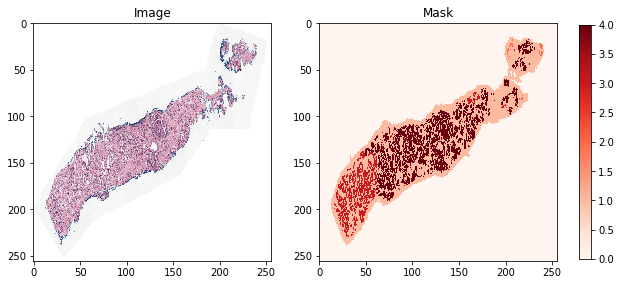

In [148]:
w = h = 256
sample = train_csv.sample()
image_id = sample.image_id.iloc[0].strip()
provider = sample.data_provider.iloc[0]
isup = sample.isup_grade.iloc[0]
gleason = sample.gleason_score.iloc[0]
print(f'Showing image_id: {image_id} from {provider}')
print(f'ISUP Grade: {isup}, Gleason Score: {gleason}')
img = tiff.imread(os.path.join(images, f'{image_id}.tiff'))
img = cv2.resize(img, (w, h))
mask = os.path.join(masks, f'{image_id}_mask.tiff')
mask_ = None
if os.path.exists(mask):
    print('Has Mask')
    mask = tiff.imread(mask)[:,:,0]
    mask = cv2.resize(mask, (w, h))
else:
    mask = np.zeros_like(img)
fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(img)
ax[0].set_title('Image')
m = ax[1].imshow(mask, cmap='Reds')
ax[1].set_title('Mask')
fig.colorbar(m, ax=ax.ravel().tolist(), fraction=0.021, pad=0.04)
plt.show()

<br>

# Distribution of Scores

### More 0 & 1s compared to other grades, rest are pretty uniform

In [153]:
isup_counts = train_csv.groupby('isup_grade').agg({'image_id':'count'}).reset_index()
isup_counts.rename(columns={'image_id':'counts'}, inplace=True)

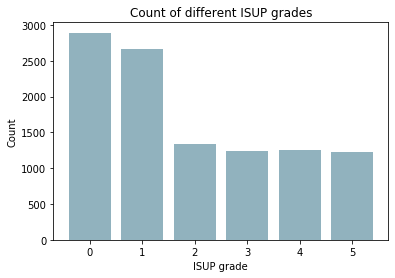

In [160]:
plt.bar(x=isup_counts.isup_grade, height=isup_counts.counts, color='#91B2BE')
plt.xlabel('ISUP grade')
plt.ylabel('Count')
plt.title('Count of different ISUP grades')
plt.show()

### Each provider labelled pretty much the same amount of images

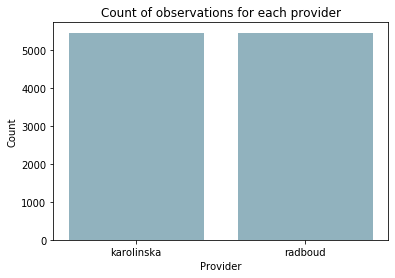

In [177]:
plt.bar(x=['karolinska', 'radboud'], 
        height=[sum(train_csv.data_provider=='karolinska'), 
                sum(train_csv.data_provider=='karolinska')], color='#91B2BE')
plt.title('Count of observations for each provider')
plt.ylabel('Count')
plt.xlabel('Provider')
plt.show()

### Karolinska seems to be more conservative with grades compared to Radboud

In [162]:
karolinska = train_csv.loc[train_csv.data_provider=='karolinska', :]
radboud = train_csv.loc[train_csv.data_provider=='radboud', :]

karolinska_counts = karolinska.groupby('isup_grade').agg({'image_id':'count'}).reset_index()
karolinska_counts.rename(columns={'image_id':'counts'}, inplace=True)

radboud_counts = radboud.groupby('isup_grade').agg({'image_id':'count'}).reset_index()
radboud_counts.rename(columns={'image_id':'counts'}, inplace=True)

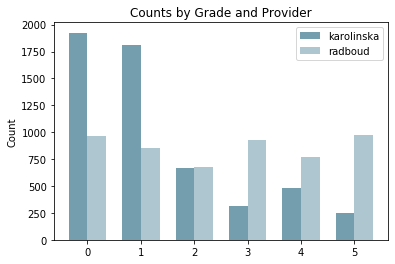

In [172]:
# https://matplotlib.org/examples/api/barchart_demo.html

N = 6
ind = np.arange(N)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind, karolinska_counts.counts, width, color='#749DAD')
rects2 = ax.bar(ind + width, radboud_counts.counts, width, color='#AEC6CF')
ax.set_ylabel('Count')
ax.set_title('Counts by Grade and Provider')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels([str(i) for i in range(6)])
ax.legend((rects1[0], rects2[0]), ('karolinska', 'radboud'))
plt.show()